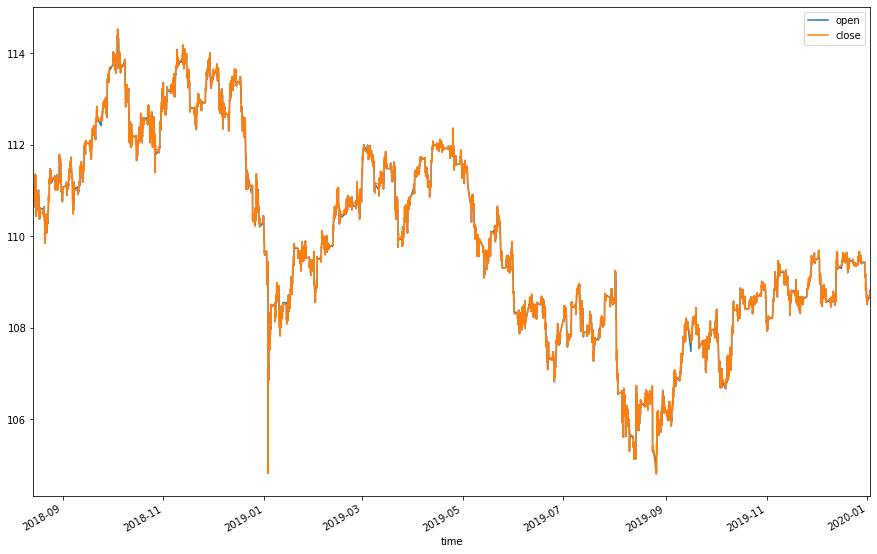

In [78]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('2018-08-14_06_00_00_2020-01-02_19_00_00_H1.csv', index_col='time', parse_dates=True)
df.drop(columns=['complete'],inplace=True)
df.plot(y=['open','close'],figsize=(15,10));

In [79]:
from statsmodels.tsa.ar_model import AR, ARResults
df

,open,high,low,close,amount
time,,,,,
2018-08-14 06:00:00,110.687,110.766,110.636,110.744,924.0
2018-08-14 07:00:00,110.748,110.772,110.712,110.724,519.0
2018-08-14 08:00:00,110.722,110.724,110.602,110.631,524.0
2018-08-14 09:00:00,110.633,110.832,110.589,110.787,1425.0
2018-08-14 10:00:00,110.790,110.868,110.700,110.780,944.0
...,...,...,...,...,...
2020-01-02 15:00:00,108.744,108.750,108.712,108.712,107.0
2020-01-02 16:00:00,108.710,108.800,108.696,108.784,417.0
2020-01-02 17:00:00,108.782,108.820,108.766,108.780,561.0


In [80]:
periods = 8619
df.index = pd.date_range(start='2018-08-14 06:00:00',freq='H',periods=periods)
df.index

DatetimeIndex(['2018-08-14 06:00:00', '2018-08-14 07:00:00',
               '2018-08-14 08:00:00', '2018-08-14 09:00:00',
               '2018-08-14 10:00:00', '2018-08-14 11:00:00',
               '2018-08-14 12:00:00', '2018-08-14 13:00:00',
               '2018-08-14 14:00:00', '2018-08-14 15:00:00',
               ...
               '2019-08-07 23:00:00', '2019-08-08 00:00:00',
               '2019-08-08 01:00:00', '2019-08-08 02:00:00',
               '2019-08-08 03:00:00', '2019-08-08 04:00:00',
               '2019-08-08 05:00:00', '2019-08-08 06:00:00',
               '2019-08-08 07:00:00', '2019-08-08 08:00:00'],
              dtype='datetime64[ns]', length=8619, freq='H')

In [81]:
df = df[['open']]
df.head()

,open
2018-08-14 06:00:00,110.687
2018-08-14 07:00:00,110.748
2018-08-14 08:00:00,110.722
2018-08-14 09:00:00,110.633
2018-08-14 10:00:00,110.790


In [82]:
len(df)

8619

In [83]:
import math
train = df.iloc[:math.ceil(periods*0.8)]
test = df.iloc[math.ceil(periods*0.8):]

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
model = AR(train['open'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const      0.091512
L1.open    0.999168
dtype: float64


In [86]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [87]:
predictions1

2019-05-28 14:00:00    107.927745
2019-05-28 15:00:00    107.929489
2019-05-28 16:00:00    107.931232
2019-05-28 17:00:00    107.932973
2019-05-28 18:00:00    107.934712
                          ...    
2019-08-08 04:00:00    109.522407
2019-08-08 05:00:00    109.522825
2019-08-08 06:00:00    109.523242
2019-08-08 07:00:00    109.523659
2019-08-08 08:00:00    109.524075
Freq: H, Name: AR(1) Predictions, Length: 1723, dtype: float64

In [88]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['open'][i]}")

predicted=107.9277453, expected=107.98100000000001
predicted=107.9294892, expected=107.883
predicted=107.9312316, expected=107.95
predicted=107.9329726, expected=107.882
predicted=107.9347121, expected=107.699
predicted=107.9364502, expected=107.65799999999999
predicted=107.9381868, expected=107.54799999999999
predicted=107.939922 , expected=107.554
predicted=107.9416557, expected=107.71799999999999
predicted=107.943388 , expected=107.72200000000001
predicted=107.9451189, expected=107.681
predicted=107.9468483, expected=107.654
predicted=107.9485763, expected=107.69
predicted=107.9503028, expected=107.69200000000001
predicted=107.9520279, expected=107.693
predicted=107.9537516, expected=107.708
predicted=107.9554739, expected=107.72
predicted=107.9571947, expected=107.714
predicted=107.958914 , expected=107.728
predicted=107.960632 , expected=107.516
predicted=107.9623485, expected=107.355
predicted=107.9640636, expected=107.49600000000001
predicted=107.9657772, expected=107.46
predict

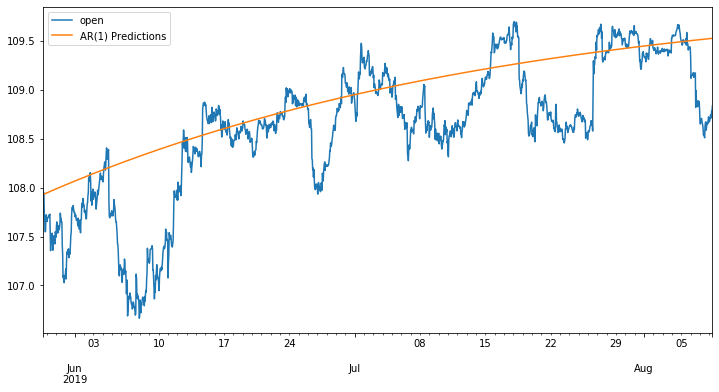

In [89]:
test['open'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

In [90]:
# Recall that our model was already created above based on the training set
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const      0.091295
L1.open    0.996619
L2.open    0.002551
dtype: float64


In [91]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

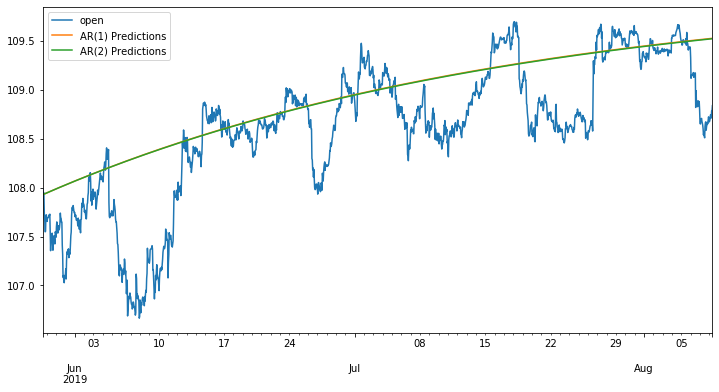

In [92]:
test['open'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [93]:
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 35
Coefficients:
const       0.083633
L1.open     0.995838
L2.open    -0.027543
L3.open     0.021934
L4.open     0.022320
L5.open    -0.009209
L6.open     0.011587
L7.open    -0.003252
L8.open    -0.017513
L9.open     0.004396
L10.open   -0.005401
L11.open   -0.005542
L12.open    0.000551
L13.open    0.007241
L14.open    0.022604
L15.open   -0.033719
L16.open    0.011989
L17.open    0.007175
L18.open   -0.006100
L19.open   -0.020814
L20.open    0.032939
L21.open   -0.027487
L22.open    0.014194
L23.open   -0.023086
L24.open    0.016272
L25.open   -0.000668
L26.open    0.027954
L27.open   -0.016674
L28.open   -0.012136
L29.open    0.015695
L30.open    0.001742
L31.open    0.002039
L32.open   -0.016439
L33.open    0.037049
L34.open   -0.009451
L35.open   -0.019245
dtype: float64


In [94]:
start = len(train)
end = len(train)+len(test)-1
print(len(train)+len(test)-1)
rename = f'AR(35) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

8618


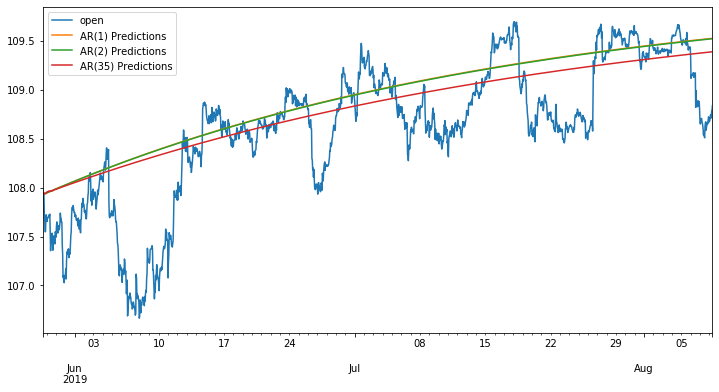

In [95]:
test['open'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

In [96]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(35)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['open'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 0.2757009205
AR(2) Error: 0.2739442488
AR(35) Error: 0.2354108003


In [97]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: -4.8916
AR(2) AIC: -4.8914
AR(35) AIC: -4.8818


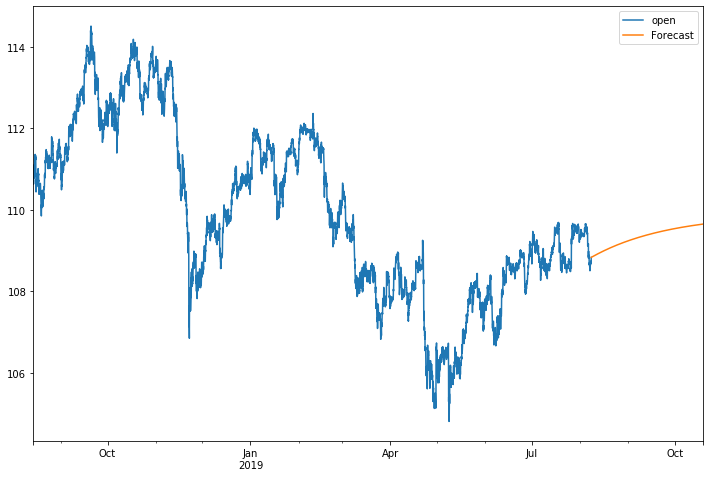

In [98]:
# First, retrain the model on the full dataset
model = AR(df['open'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+math.ceil(periods*0.2), dynamic=False).rename('Forecast')

# Plot the results
df['open'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,8));

In [99]:
periods = 700
fcast = ARfit.predict(start=len(df), end=len(df)+periods, dynamic=False).rename('Forecast')

df_new = pd.read_csv('20200102_200000_20200201_120000_H1.csv', index_col='time', parse_dates=True)
# df_new['open'].plot(legend=True)
# fcast.plot(legend=True)

In [100]:
fcast.index = pd.date_range(start='2020-01-02 20:00:00',freq='H',periods=periods+1)
fcast.index

DatetimeIndex(['2020-01-02 20:00:00', '2020-01-02 21:00:00',
               '2020-01-02 22:00:00', '2020-01-02 23:00:00',
               '2020-01-03 00:00:00', '2020-01-03 01:00:00',
               '2020-01-03 02:00:00', '2020-01-03 03:00:00',
               '2020-01-03 04:00:00', '2020-01-03 05:00:00',
               ...
               '2020-01-31 15:00:00', '2020-01-31 16:00:00',
               '2020-01-31 17:00:00', '2020-01-31 18:00:00',
               '2020-01-31 19:00:00', '2020-01-31 20:00:00',
               '2020-01-31 21:00:00', '2020-01-31 22:00:00',
               '2020-01-31 23:00:00', '2020-02-01 00:00:00'],
              dtype='datetime64[ns]', length=701, freq='H')

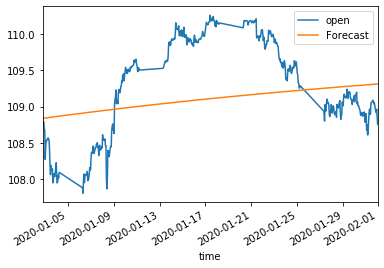

In [101]:
ax = df_new['open'].plot(legend=True)
fcast.plot(legend=True)